In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install transformers

import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 12.4 MB/s eta 0:00:00


In [5]:
#data loading
coqa = pd.read_json('Mathili DataSet/Maithili_DataSet.json')
coqa.head()

,version,data
0,1,"{'source': 'wikipedia', 'id': '3zotghdk5ibi9ce..."
1,1,"{'source': 'cnn', 'id': '3wj1oxy92agboo5nlq4r7..."
2,1,"{'source': 'gutenberg', 'id': '3bdcf01ogxu7zdn..."
3,1,"{'source': 'cnn', 'id': '3ewijtffvo7wwchw6rtya..."
4,1,"{'source': 'gutenberg', 'id': '3urfvvm165iantk..."


In [6]:
del coqa["version"]

In [7]:
cols = ["text","question","answer"]

# j = 1
comp_list = []
for index, row in coqa.iterrows():
    for i in range(len(row["data"]["questions"])):
        temp_list = []
#         temp_list.append(j)
        temp_list.append(row["data"]["story"])
        temp_list.append(row["data"]["questions"][i]["input_text"])
        temp_list.append(row["data"]["answers"][i]["input_text"])
        comp_list.append(temp_list)
#     j += 1
new_df = pd.DataFrame(comp_list, columns=cols) 

In [8]:
new_df.to_csv("CoQA_data.csv", index=False)

In [9]:
data = pd.read_csv("CoQA_data.csv")
data.head()

,text,question,answer
0,"वेटिकन एपोस्टोलिक पुस्तकालय (), जेकरा अधिक आमत...",वट औपचारिक रूप स कहिया खोलल गेल?,एकर औपचारिक स्थापना 1475 मे भेल छल
1,"वेटिकन एपोस्टोलिक पुस्तकालय (), जेकरा अधिक आमत...",पुस्तकालय कोन काजक लेल अछि?,अनुसंधान
2,"वेटिकन एपोस्टोलिक पुस्तकालय (), जेकरा अधिक आमत...",कोन-कोन विषयक लेल?,"इतिहास, आ कानून"
3,"वेटिकन एपोस्टोलिक पुस्तकालय (), जेकरा अधिक आमत...",आओर?,"दर्शन, विज्ञान एवं धर्मशास्त्र"
4,"वेटिकन एपोस्टोलिक पुस्तकालय (), जेकरा अधिक आमत...",जे 2014 मे शुरू भेल छल?,एकटा परियोजना


In [10]:
print("Number of question and answers: ", len(data))

Number of question and answers:  95


In [11]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [12]:
random_num = np.random.randint(0,len(data))

question = data["question"][random_num]
text = data["text"][random_num]
token1 = tokenizer.tokenize(text,max_length=512, truncation=True)

Keyword arguments {'max_length': 512, 'truncation': True} not recognized.


In [13]:
print(question, "\n", text)

ओ की आशा क' रहल छलीह जे ओ हुनका संग नहि होब' सकलीह? 
 सातवाँ अध्याय। विथरस्टीन के बेटी 

"लस्सिटर, की अहाँ हमर सवार बनब?" जेन हुनका सँ पूछने छलीह। 

"हम हिसाब लगाबैत छी," ओ उत्तर देने छलाह। 

शब्द जतेक कम छल, जेन केँ बुझल छलनि जे ई कतेक असीम रूप सँ तात्पर्य अछि। ओ चाहैत छलीह जे ओ अपन मवेशी आ घोड़ा आ रेंजक जिम्मा लेथि, आ जँ से संभव हो तँ हुनका सभकेँ बचाबथि । तइयो, भले ओ अपन सभटा मतलब जोर-जोर सँ नहि बाजि सकैत छलीह, मुदा अपना संग एकदम ईमानदार छलीह. कीमत जे किछु देबय पड़तैक, ओकरा लसिटर केँ अपन नजदीक राखय पड़तैक; ओकरा ओकरा सँ ओहि आदमी केँ बचाबय पड़तैक जे मिल्ली अर्ने केँ कॉटनवुड्स धरि ल' गेल छलैक। अपनऽ डर म॑ वू अपनऽ दिमाग क॑ एतना नियंत्रित करी लेलकै कि ई मॉर्मन के नाम अपनऽ ही आत्मा के सामने नै फुसफुसाबै छेली, सोचबो नै करलकै । एकरऽ अलावा, ई चीज स॑ परे वू अपनऽ ऊपर डाललऽ गेलऽ पवित्र दायित्व के रूप म॑ मानलकै, ई महत्वपूर्ण समय म॑ एक सहायक के, एक दोस्त के, एगो चैंपियन के जरूरत छेलै । जँ ओ एहि बंदूकधारी पर शासन क' सकैत छलीह, जेना वेंटर्स ओकरा कहने छलाह, जँ ओ ओकरा खून बहाबय सँ सेहो रोकि सकैत छलीह, 

In [14]:
input_ids = tokenizer.encode(question, text,max_length = 512)
# input_ids = token1.encode(question, text)

print("The input has a total of {} tokens.".format(len(input_ids)))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


The input has a total of 512 tokens.


In [15]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)

for token, id in zip(tokens, input_ids):
    print('{:8}{:8,}'.format(token,id))

[CLS]        101
[UNK]        100
क          1,315
##ी       29,878
आ          1,312
##श       29,872
##ा       29,876
क          1,315
'          1,005
र          1,333
##ह       29,875
##ल       29,870
[UNK]        100
ज          1,319
[UNK]        100
ह          1,339
##न       29,863
##क       29,851
##ा       29,876
स          1,338
##ग       29,853
न          1,327
##ह       29,875
##ि       29,877
ह          1,339
##ो       29,879
##ब       29,865
'          1,005
स          1,338
##क       29,851
##ल       29,870
##ी       29,878
##ह       29,875
?          1,029
[SEP]        102
स          1,338
##ा       29,876
##त       29,859
##व       29,871
##ा       29,876
अ          1,311
##ध       29,862
##य       29,868
##ा       29,876
##य       29,868
।          1,344
व          1,335
##ि       29,877
##थ       29,860
##र       29,869
##स       29,874
##ट       29,856
##ी       29,878
##न       29,863
क          1,315
ब          1,329
##ट       29,856
##ी       29,878
"          1,0

In [16]:
#first occurence of [SEP] token
sep_idx = input_ids.index(tokenizer.sep_token_id)
# sep_idx = input_ids.index(tokenizer.prepare_seq2seq_batch([text]))
print(sep_idx)

#number of tokens in segment A - question
num_seg_a = sep_idx+1
print(num_seg_a)

#number of tokens in segment B - text
num_seg_b = len(input_ids) - num_seg_a
print(num_seg_b)

segment_ids = [0]*num_seg_a + [1]*num_seg_b
print(segment_ids)

assert len(segment_ids) == len(input_ids)

34
35
477
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [17]:
#token input_ids to represent the input
#token segment_ids to differentiate our segments - text and question 
output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
# print(output.start_logits, output.end_logits)

In [18]:
#tokens with highest start and end scores
answer_start = torch.argmax(output.start_logits)
answer_end = torch.argmax(output.end_logits)
#print(answer_start, answer_end)

In [19]:
if answer_end >= answer_start:
    answer = " ".join(tokens[answer_start:answer_end+1])
else:
    print("I am unable to find the answer to this question. Can you please ask another question?")
    
print("Text:\n{}".format(text.capitalize()))
print("\nQuestion:\n{}".format(question.capitalize()))
print("\nAnswer:\n{}.".format(answer.capitalize()))

Text:
सातवाँ अध्याय। विथरस्टीन के बेटी 

"लस्सिटर, की अहाँ हमर सवार बनब?" जेन हुनका सँ पूछने छलीह। 

"हम हिसाब लगाबैत छी," ओ उत्तर देने छलाह। 

शब्द जतेक कम छल, जेन केँ बुझल छलनि जे ई कतेक असीम रूप सँ तात्पर्य अछि। ओ चाहैत छलीह जे ओ अपन मवेशी आ घोड़ा आ रेंजक जिम्मा लेथि, आ जँ से संभव हो तँ हुनका सभकेँ बचाबथि । तइयो, भले ओ अपन सभटा मतलब जोर-जोर सँ नहि बाजि सकैत छलीह, मुदा अपना संग एकदम ईमानदार छलीह. कीमत जे किछु देबय पड़तैक, ओकरा लसिटर केँ अपन नजदीक राखय पड़तैक; ओकरा ओकरा सँ ओहि आदमी केँ बचाबय पड़तैक जे मिल्ली अर्ने केँ कॉटनवुड्स धरि ल' गेल छलैक। अपनऽ डर म॑ वू अपनऽ दिमाग क॑ एतना नियंत्रित करी लेलकै कि ई मॉर्मन के नाम अपनऽ ही आत्मा के सामने नै फुसफुसाबै छेली, सोचबो नै करलकै । एकरऽ अलावा, ई चीज स॑ परे वू अपनऽ ऊपर डाललऽ गेलऽ पवित्र दायित्व के रूप म॑ मानलकै, ई महत्वपूर्ण समय म॑ एक सहायक के, एक दोस्त के, एगो चैंपियन के जरूरत छेलै । जँ ओ एहि बंदूकधारी पर शासन क' सकैत छलीह, जेना वेंटर्स ओकरा कहने छलाह, जँ ओ ओकरा खून बहाबय सँ सेहो रोकि सकैत छलीह, त' ओकर लौ आ ओकर उपस्थिति ओकरा पर ओकर चर्चक लोक द

In [20]:
start_scores = output.start_logits.detach().numpy().flatten()
end_scores = output.end_logits.detach().numpy().flatten()

token_labels = []
for i, token in enumerate(tokens):
    token_labels.append("{}-{}".format(token,i))

In [21]:
print(len(token_labels))

512


In [ ]:
# #first 100 tokens
# plt.rcParams["figure.figsize"] = (20,10)
# ax = sns.barplot(x=token_labels[:80], y=start_scores[:80], ci=None)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
# ax.grid(True)
# plt.title("Start word scores")
# plt.show()

In [ ]:
# #last 100 tokens
# plt.rcParams["figure.figsize"] = (20,10)
# ax = sns.barplot(x=token_labels[-80:], y=start_scores[-80:], ci=None)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
# ax.grid(True)
# plt.title("Start word scores")
# plt.show()

In [27]:
# #first 100 tokens
# plt.rcParams["figure.figsize"] = (20,10)
# ax = sns.barplot(x=token_labels[:80], y=end_scores[:80], ci=None)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
# ax.grid(True)
# plt.title("End word scores")
# plt.show()

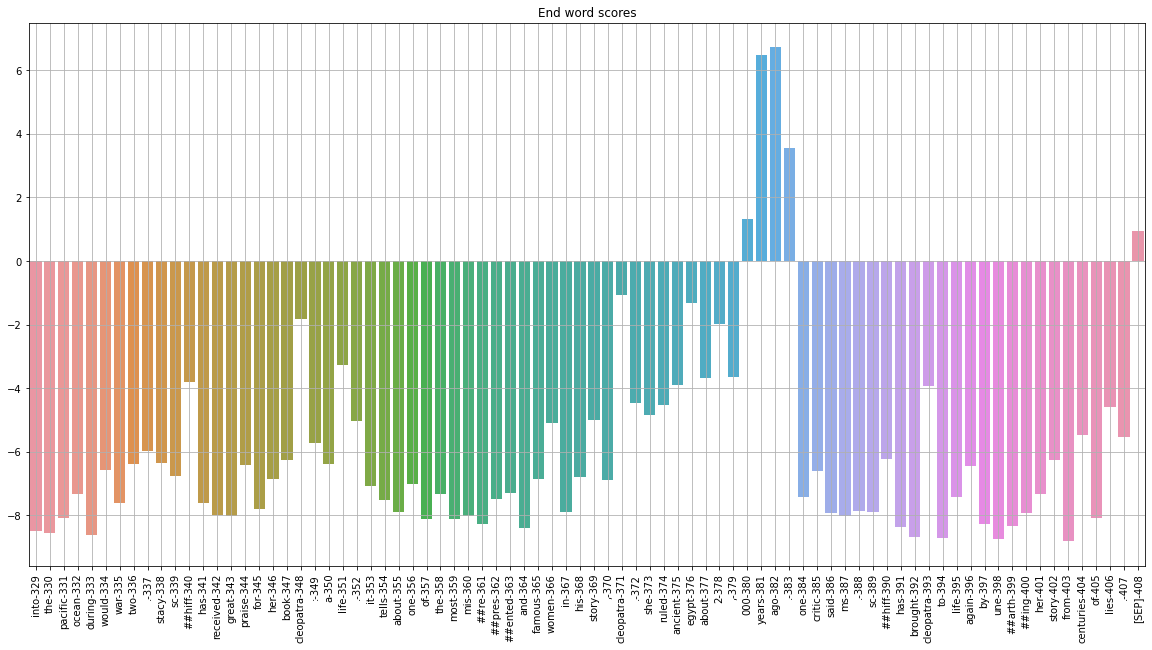

In [ ]:
# #last 100 tokens
# plt.rcParams["figure.figsize"] = (20,10)
# ax = sns.barplot(x=token_labels[-80:], y=end_scores[-80:], ci=None)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
# ax.grid(True)
# plt.title("End word scores")
# plt.show()

In [26]:
answer = tokens[answer_start]

for i in range(answer_start+1, answer_end+1):
    if tokens[i][0:2] == "##":
        answer += tokens[i][2:]
    else:
        answer += " " + tokens[i]

In [45]:
def question_answer(question, text):
    
    #tokenize question and text in ids as a pair
    input_ids = tokenizer.encode(question, text)
    
    #string version of tokenized ids
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    
    #segment IDs
    #first occurence of [SEP] token
    sep_idx = input_ids.index(tokenizer.sep_token_id)

    #number of tokens in segment A - question
    num_seg_a = sep_idx+1

    #number of tokens in segment B - text
    num_seg_b = len(input_ids) - num_seg_a
    
    #list of 0s and 1s
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    
    assert len(segment_ids) == len(input_ids)
    
    #model output using input_ids and segment_ids
    output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
    
    #reconstructing the answer
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)

    if answer_end >= answer_start:
        answer = tokens[answer_start]
        for i in range(answer_start+1, answer_end+1):
            if tokens[i][0:2] == "##":
                answer += tokens[i][2:]
            else:
                answer += " " + tokens[i]
                
    if answer.startswith("[CLS]"):
        answer = "Unable to find the answer to your question."
    
    # print("Text:\n{}".format(text.capitalize()))
    # print("\nQuestion:\n{}".format(question.capitalize()))
    # print("\nAnswer:\n{}".format(answer.capitalize()))
    return answer 
    

In [29]:
text = """निशांत नामक एकटा लड़का अछि। ओ हाजीपुर मे रहैत छथि। हुनका क्रिकेट खेलनाय नीक लगैत छनि। तीन टा संगी छन्हि। हिनकर मित्रक नाम पुष्पराज, चंदन आ राजकुमार अछि । सब cvrgu मे पढ़ैत छथि। पुष्पराज सबसँ शरारती लड़का अछि।"""
question = "लड़का के नाम की छै?"

question_answer(question, text)


Answer:
निशात नामक एकटा


In [30]:
text = """निशांत नामक एकटा लड़का अछि। ओ हाजीपुर मे रहैत छथि। हुनका क्रिकेट खेलनाय नीक लगैत छनि। तीन टा संगी छन्हि। हिनकर मित्रक नाम पुष्पराज, चंदन आ राजकुमार अछि । सब cvrgu मे पढ़ैत छथि। पुष्पराज सबसँ शरारती लड़का अछि।"""
question = "ओ कतय रहैत अछि ?"

question_answer(question, text)


Answer:
[unk] हाजीपर


In [ ]:
pip install googletrans==3.1.0a0

Installing **FLASK:**

In [ ]:
!pip install flask_ngrok

In [35]:
from flask import *
from flask_ngrok import run_with_ngrok

In [46]:
app=Flask(__name__)

In [47]:
@app.route('/')
def hello_world():
  return render_template("index.html")
@app.route('/get-answer',methods=['POST','GET'])
def login():
    if request.method == "POST":
      # showAns = "show_ans"
      text = request.form['text']
      question = request.form['question']
      answer2 = question_answer(question, text)
      # original2 = data.loc[data["question"] == question]["answer"].values[0], original=original2
      return render_template('index.html', answer=answer2, text2=text, question2=question)
      # return render_template('demo.html', answer=answer2)

Installing **ngRok**:-

In [ ]:
!pip install pyngrok

In [43]:
!ngrok authtoken 2HJo8zxEFWck6qiBLAyy1HoVulN_6TG9Yt8e1wrnyCWjabnuZ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
run_with_ngrok(app)
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://f69e-34-74-70-157.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 15:04:36] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 15:04:36] "GET /static/css/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 15:04:36] "GET /static/js/script.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 15:04:37] "GET /static/js/script.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 15:04:37] "GET /static/image/C._V._Raman_Global_University_Logo.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 15:04:37] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 15:05:11] "POST /get-answer HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 15:05:12] "GET /static/css/style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 15:05:12] "GET /static/js/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 15:05:13] "GET /static/js/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 15:05:13] "GET /static/image/C

In [32]:
text = input("Please enter your text: \n")

question = input("\nPlease enter your question: \n")

while True:
    question_answer(question, text)
    
    flag = True
    flag_N = False
    
    while flag:
        response = input("\nDo you want to ask any another question (Y/N)? ")
        if response[0] == "Y":
            question = input("\nPlease enter your question: \n")
            flag = False
        elif response[0] == "N":
            print("\nThank you!!")
            flag = False
            flag_N = True
            
    if flag_N == True:
        break

Please enter your text: 
निशांत नामक एकटा लड़का अछि। ओ हाजीपुर मे रहैत छथि। हुनका क्रिकेट खेलनाय नीक लगैत छनि। तीन टा संगी छन्हि। हिनकर मित्रक नाम पुष्पराज, चंदन आ राजकुमार अछि । सब cvrgu मे पढ़ैत छथि। पुष्पराज सबसँ शरारती लड़का अछि।

Please enter your question: 
लड़का के नाम की छै?

Answer:
निशात नामक एकटा

Do you want to ask any another question (Y/N)? Y

Please enter your question: 
ओ कतय रहैत अछि ?

Answer:
[unk] हाजीपर

Do you want to ask any another question (Y/N)? Y

Please enter your question: 
जे सबसँ नटखट लड़का अछि?

Answer:
पषपराज

Do you want to ask any another question (Y/N)? N

Thank you!!
